In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Machine Learning Workflow

Let's go through the (beginning of the) machine learning workflow using a familiar dataset.

![penguins](../week_01/penguins.png)

## The Workflow

![workflow](./ml_workflow.png)

## 1. Define Business Goal
...

## 2. Get Data
...

In [3]:
df = pd.read_csv('/Users/marf/spiced_projects/a-star-anise-student-code/week02/data/penguins_simple.csv', sep=';')
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


In [4]:
df.shape

(333, 6)

## 3. Train-Test-Split

What is the purpose of splitting the data into training and test data?

In [5]:
from sklearn.model_selection import train_test_split 

In [6]:
y = df['Species']
X = df.drop('Species', axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(266, 5)
(266,)
(67, 5)
(67,)


## 4. Explore Data

This is your task for the afternoon. You have learnt how to do that last week.

In [9]:
df_train = pd.merge(y_train, X_train, left_on=X_train.index, right_on=y_train.index)

In [10]:
df_train.head()

,key_0,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,59,Adelie,41.6,18.0,192.0,3950.0,MALE
1,37,Adelie,36.0,18.5,186.0,3100.0,FEMALE
2,173,Chinstrap,49.5,19.0,200.0,3800.0,MALE
3,189,Chinstrap,45.5,17.0,196.0,3500.0,FEMALE
4,148,Chinstrap,51.3,19.2,193.0,3650.0,MALE


In [11]:
df_train.drop('key_0', axis=1, inplace=True)

In [12]:
df_train.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,41.6,18.0,192.0,3950.0,MALE
1,Adelie,36.0,18.5,186.0,3100.0,FEMALE
2,Chinstrap,49.5,19.0,200.0,3800.0,MALE
3,Chinstrap,45.5,17.0,196.0,3500.0,FEMALE
4,Chinstrap,51.3,19.2,193.0,3650.0,MALE


### Step 2 - Calculate the number of each species and display it as a bar plot.

In [13]:
peng_species = df_train['Species'].value_counts()
peng_species

Adelie       118
Gentoo        95
Chinstrap     53
Name: Species, dtype: int64

<BarContainer object of 3 artists>

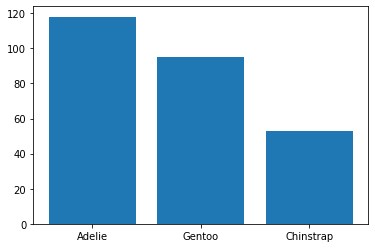

In [38]:
plt.bar(peng_species.index, peng_species)

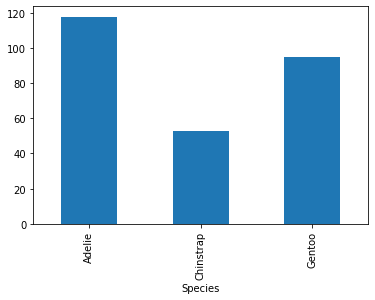

In [18]:
df_train.groupby('Species').size().plot.bar()

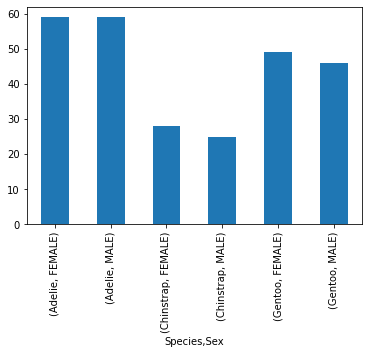

In [21]:
df_train.groupby(['Species','Sex']).size().plot.bar()

### Step 3 - Calculate the proportion of Gentoo penguins with regards to the total number penguins.

In [48]:
print('Gentoo: ' + str(round(peng_species['Gentoo']/peng_species.sum(), 2)))
print('Adelie: ' + str(round(peng_species['Adelie']/peng_species.sum(), 2)))
print('Chinstrap: ' + str(round(peng_species['Chinstrap']/peng_species.sum(), 2)))

Gentoo: 0.36
Adelie: 0.44
Chinstrap: 0.2


### Step 4 - Create a bar plot with separate bars for male/female penguins and each species of penguin

In [15]:
spec_sex = df_train.groupby('Species')['Sex'].count()
spec_sex

Species
Adelie       118
Chinstrap     53
Gentoo        95
Name: Sex, dtype: int64

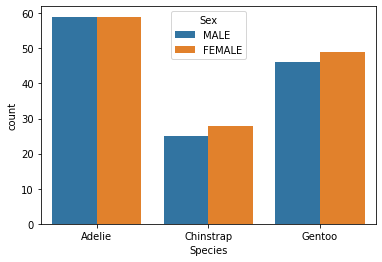

In [51]:
sns.countplot(x='Species', data=df_train, hue='Sex')

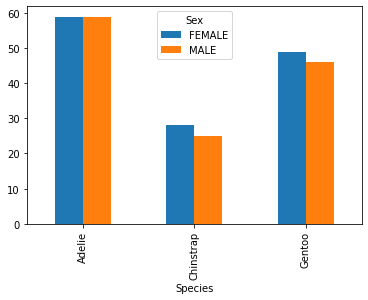

In [23]:
df_train.groupby(['Species','Sex']).size().unstack(1).plot.bar()

### Step 5 - Create a histogram showing the flipper length distribution of penguins. Compare how this changes per species.

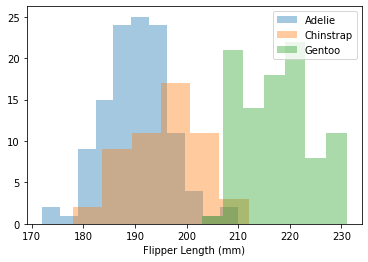

In [63]:
for species in df_train['Species'].unique():
    mask = df_train['Species'] == species
    sns.distplot(df_train[mask]['Flipper Length (mm)'], kde=False, label=species)
    
plt.legend()

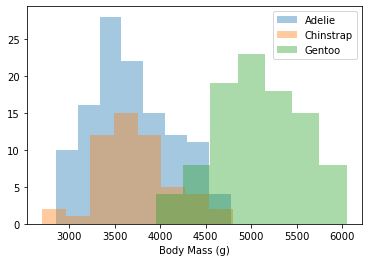

In [65]:
for species in df_train['Species'].unique():
    mask = df_train['Species'] == species
    sns.distplot(df_train[mask]['Body Mass (g)'], kde=False, label=species)
    
plt.legend()

### Step 6 - Calculate the average bill length for each species of penguin separately.

In [68]:
df_train.groupby('Species')['Culmen Length (mm)'].agg([np.mean, np.std])

,mean,std
Species,,
Adelie,38.836441,2.664379
Chinstrap,48.511321,3.419439
Gentoo,47.462105,3.135900


In [69]:
df_train.groupby('Species').agg([np.mean, np.std])

Culmen Length (mm)           Culmen Depth (mm)            \
                        mean       std              mean       std   
Species                                                              
Adelie             38.836441  2.664379         18.309322  1.192855   
Chinstrap          48.511321  3.419439         18.322642  1.173529   
Gentoo             47.462105  3.135900         14.967368  0.996424   

          Flipper Length (mm)           Body Mass (g)              
                         mean       std          mean         std  
Species                                                            
Adelie             190.271186  6.485567   3701.906780  449.182029  
Chinstrap          195.528302  7.107969   3714.622642  403.959786  
Gentoo             217.105263  6.781504   5064.473684  479.702076

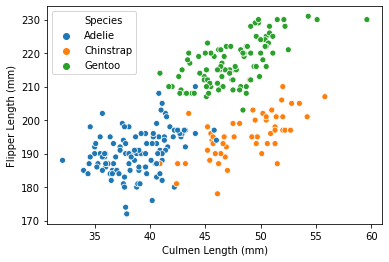

In [72]:
sns.scatterplot(x='Culmen Length (mm)', y='Flipper Length (mm)', data=df_train, hue='Species')

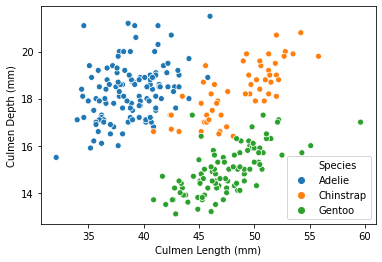

In [73]:
sns.scatterplot(x='Culmen Length (mm)', y='Culmen Depth (mm)', data=df_train, hue='Species')

### Step 7 - Are there missing values? If not, can you create some. Then fill them with a default value (try the mean)

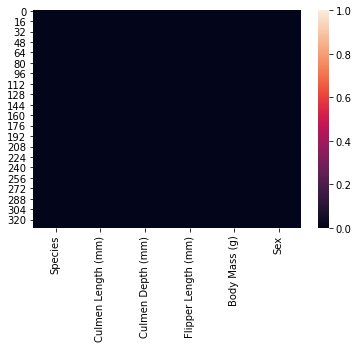

In [76]:
sns.heatmap(df.isna(), vmin=0, vmax=1)

In [77]:
df_train_Na = df_train.copy()

In [84]:
np.NaN

nan

In [91]:
df_train_Na.loc[[0, 2, 5, 10], 'Culmen Length (mm)'] = np.NaN

In [92]:
df_train_Na.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,NaN,18.0,192.0,3950.0,MALE
1,Adelie,36.0,18.5,186.0,3100.0,FEMALE
2,Chinstrap,NaN,19.0,200.0,3800.0,MALE
3,Chinstrap,45.5,17.0,196.0,3500.0,FEMALE
4,Chinstrap,51.3,19.2,193.0,3650.0,MALE


In [95]:
df_train_Na['Culmen Length (mm)'].fillna(value=df_train_Na['Culmen Length (mm)'].mean(), inplace=True)

In [96]:
df_train_Na.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,43.823664,18.0,192.0,3950.0,MALE
1,Adelie,36.000000,18.5,186.0,3100.0,FEMALE
2,Chinstrap,43.823664,19.0,200.0,3800.0,MALE
3,Chinstrap,45.500000,17.0,196.0,3500.0,FEMALE
4,Chinstrap,51.300000,19.2,193.0,3650.0,MALE


## 5. Feature Engineering

The lecture on feature engineering is scheduled for wednesday morning.

## 6. Train Model

The lecture on the model itself is scheduled for tuesday morning.

## 7. Optimize / Cross-Validation
The lecture on cross validation is schedule for wednesday afternoon.

## 8. Calculate Test Score

You will see how to do this when talking about training the model.

## 9. Deploy the model

We will talk about model deployment towards the end of the bootcamp.